# Employee Attrition Analysis

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
data= pd.read_csv(r"C:\Users\soumitra\Desktop\DS\Projects\Employee Attrition Analysis and Predictive Modeling\Data\HREmployeeAttrition.csv")
df= data.copy()

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Reading all the columns

In [4]:
pd.options.display.max_columns = 50

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Checking null values in the dataset

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Checking duplicates

In [8]:
df.duplicated().sum()

0

### Distribution of taget column (Attrition)

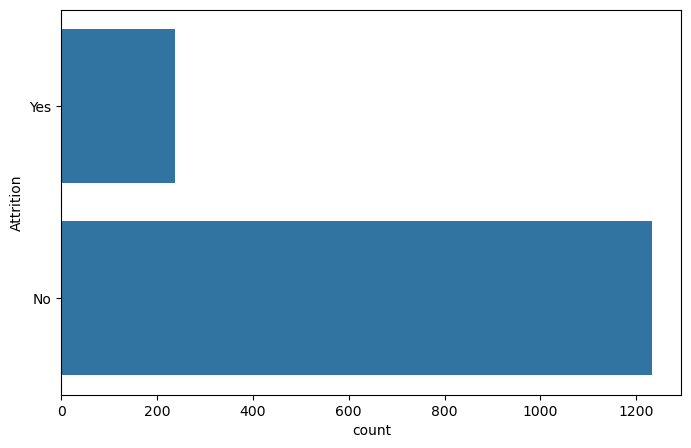

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(y='Attrition', data=df)
plt.show()

Data is imbalanced, we need to balance the data by using statistical methods.

### Finding numeric columns

In [10]:
numeric_cols_df= df.select_dtypes(include=np.number)
numeric_cols_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


### Finding categorical columns

In [11]:
for cols in df.columns:
    if cols not in numeric_cols_df.columns:
        print(cols)

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [12]:
categorical_cols_df= df[['Attrition','BusinessTravel', 'Department', 'EducationField', 
                         'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']]
categorical_cols_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


# EDA- Exploratory Data Analysis

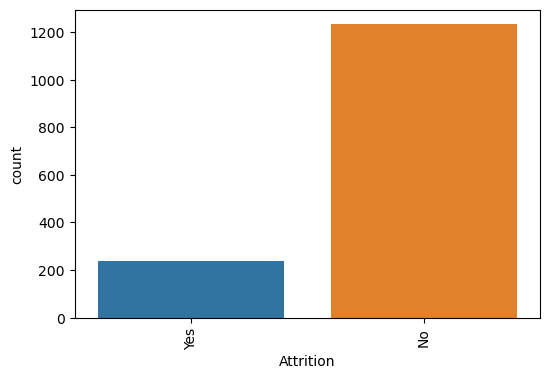

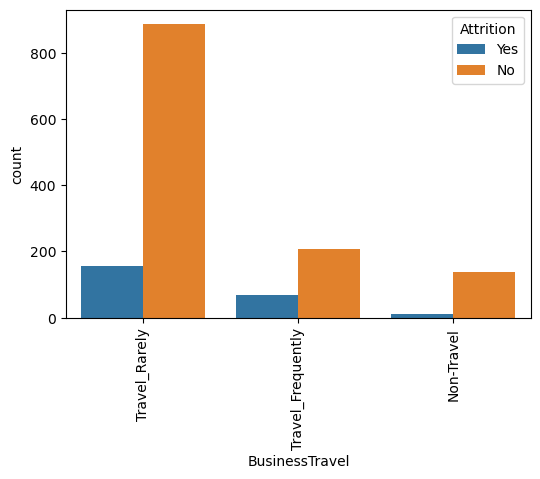

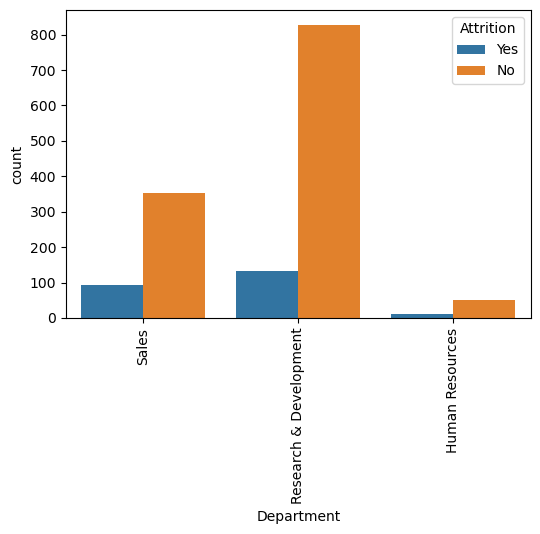

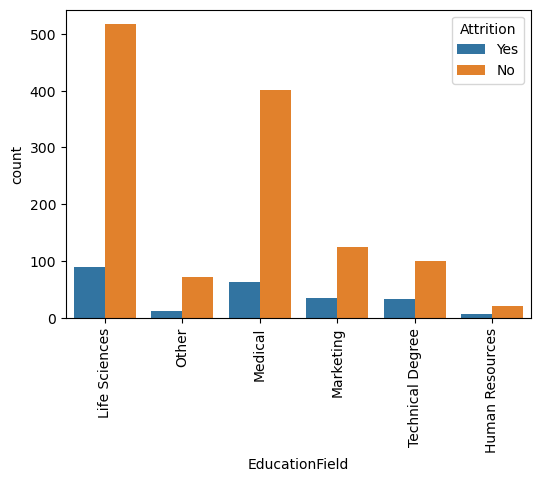

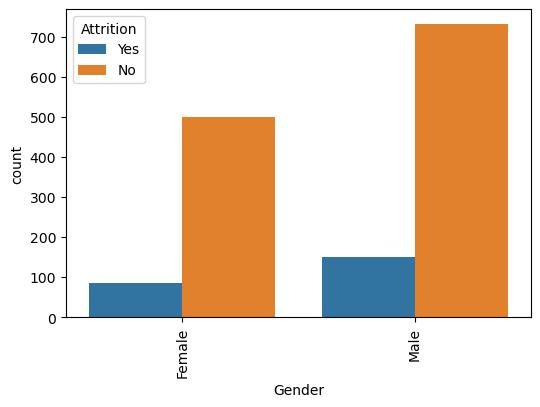

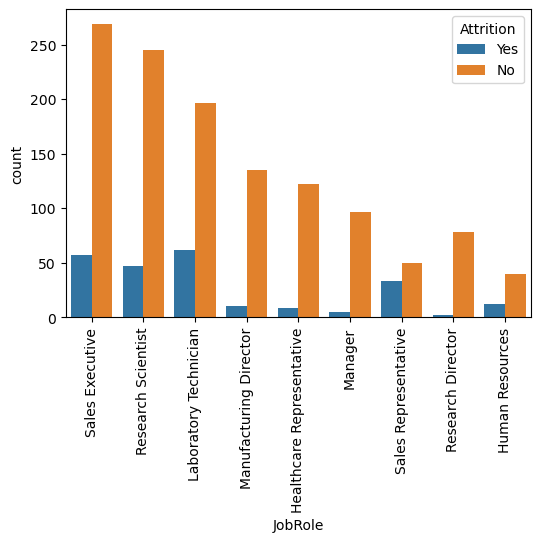

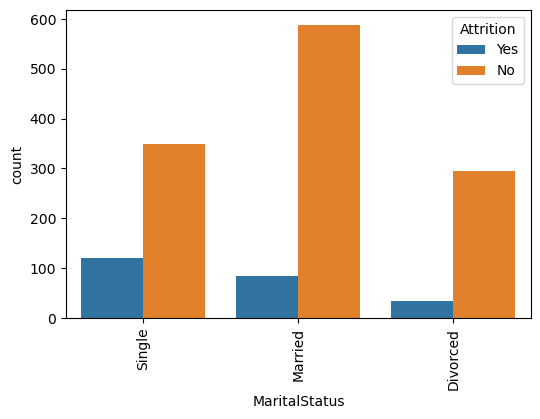

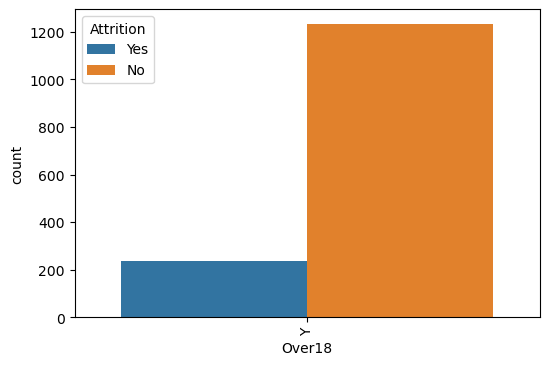

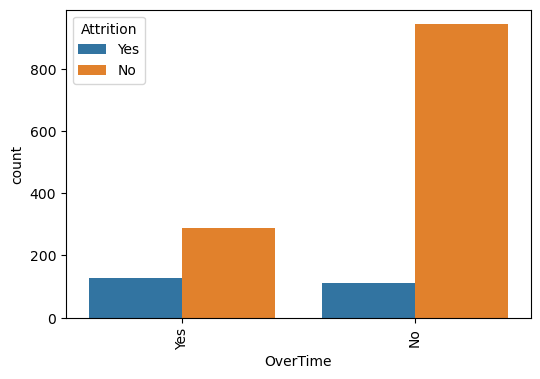

In [13]:
for cols in categorical_cols_df:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[cols], hue=df["Attrition"])
    plt.xticks(rotation=90)
    plt.show()

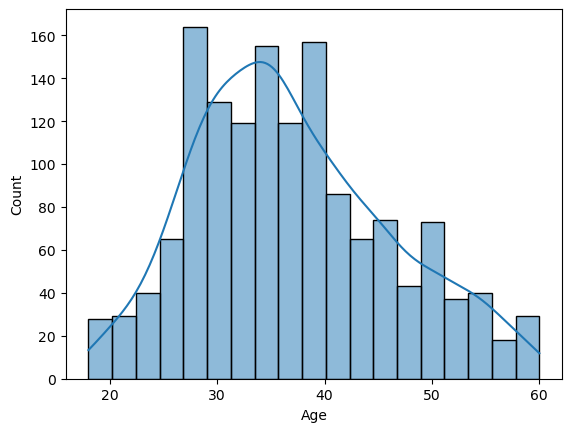

In [14]:
sns.histplot(data=df, x="Age", kde=True)
plt.show()

### Checking value counts of categorical columns for Label Encoding

In [15]:
for colss in categorical_cols_df.columns:
    print("-"*25, colss, "-"*25)
    print(df[colss].value_counts())

------------------------- Attrition -------------------------
Attrition
No     1233
Yes     237
Name: count, dtype: int64
------------------------- BusinessTravel -------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
------------------------- Department -------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
------------------------- EducationField -------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
------------------------- Gender -------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
------------------------- JobRole -------------------------
JobRole
Sales Executive              326
Research Scientist           

### Label Encoding  

In [16]:
df['Attrition'] = df['Attrition'].map({"No":0, "Yes":1})
df['Gender'] = df['Gender'].map({"Male":0, "Female":1})
df['OverTime']= df['OverTime'].map({"No":0, "Yes":1})
df['Over18']= df['Over18'].map({"N":0, "Y":1})

In [17]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,1,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,0,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,0,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0


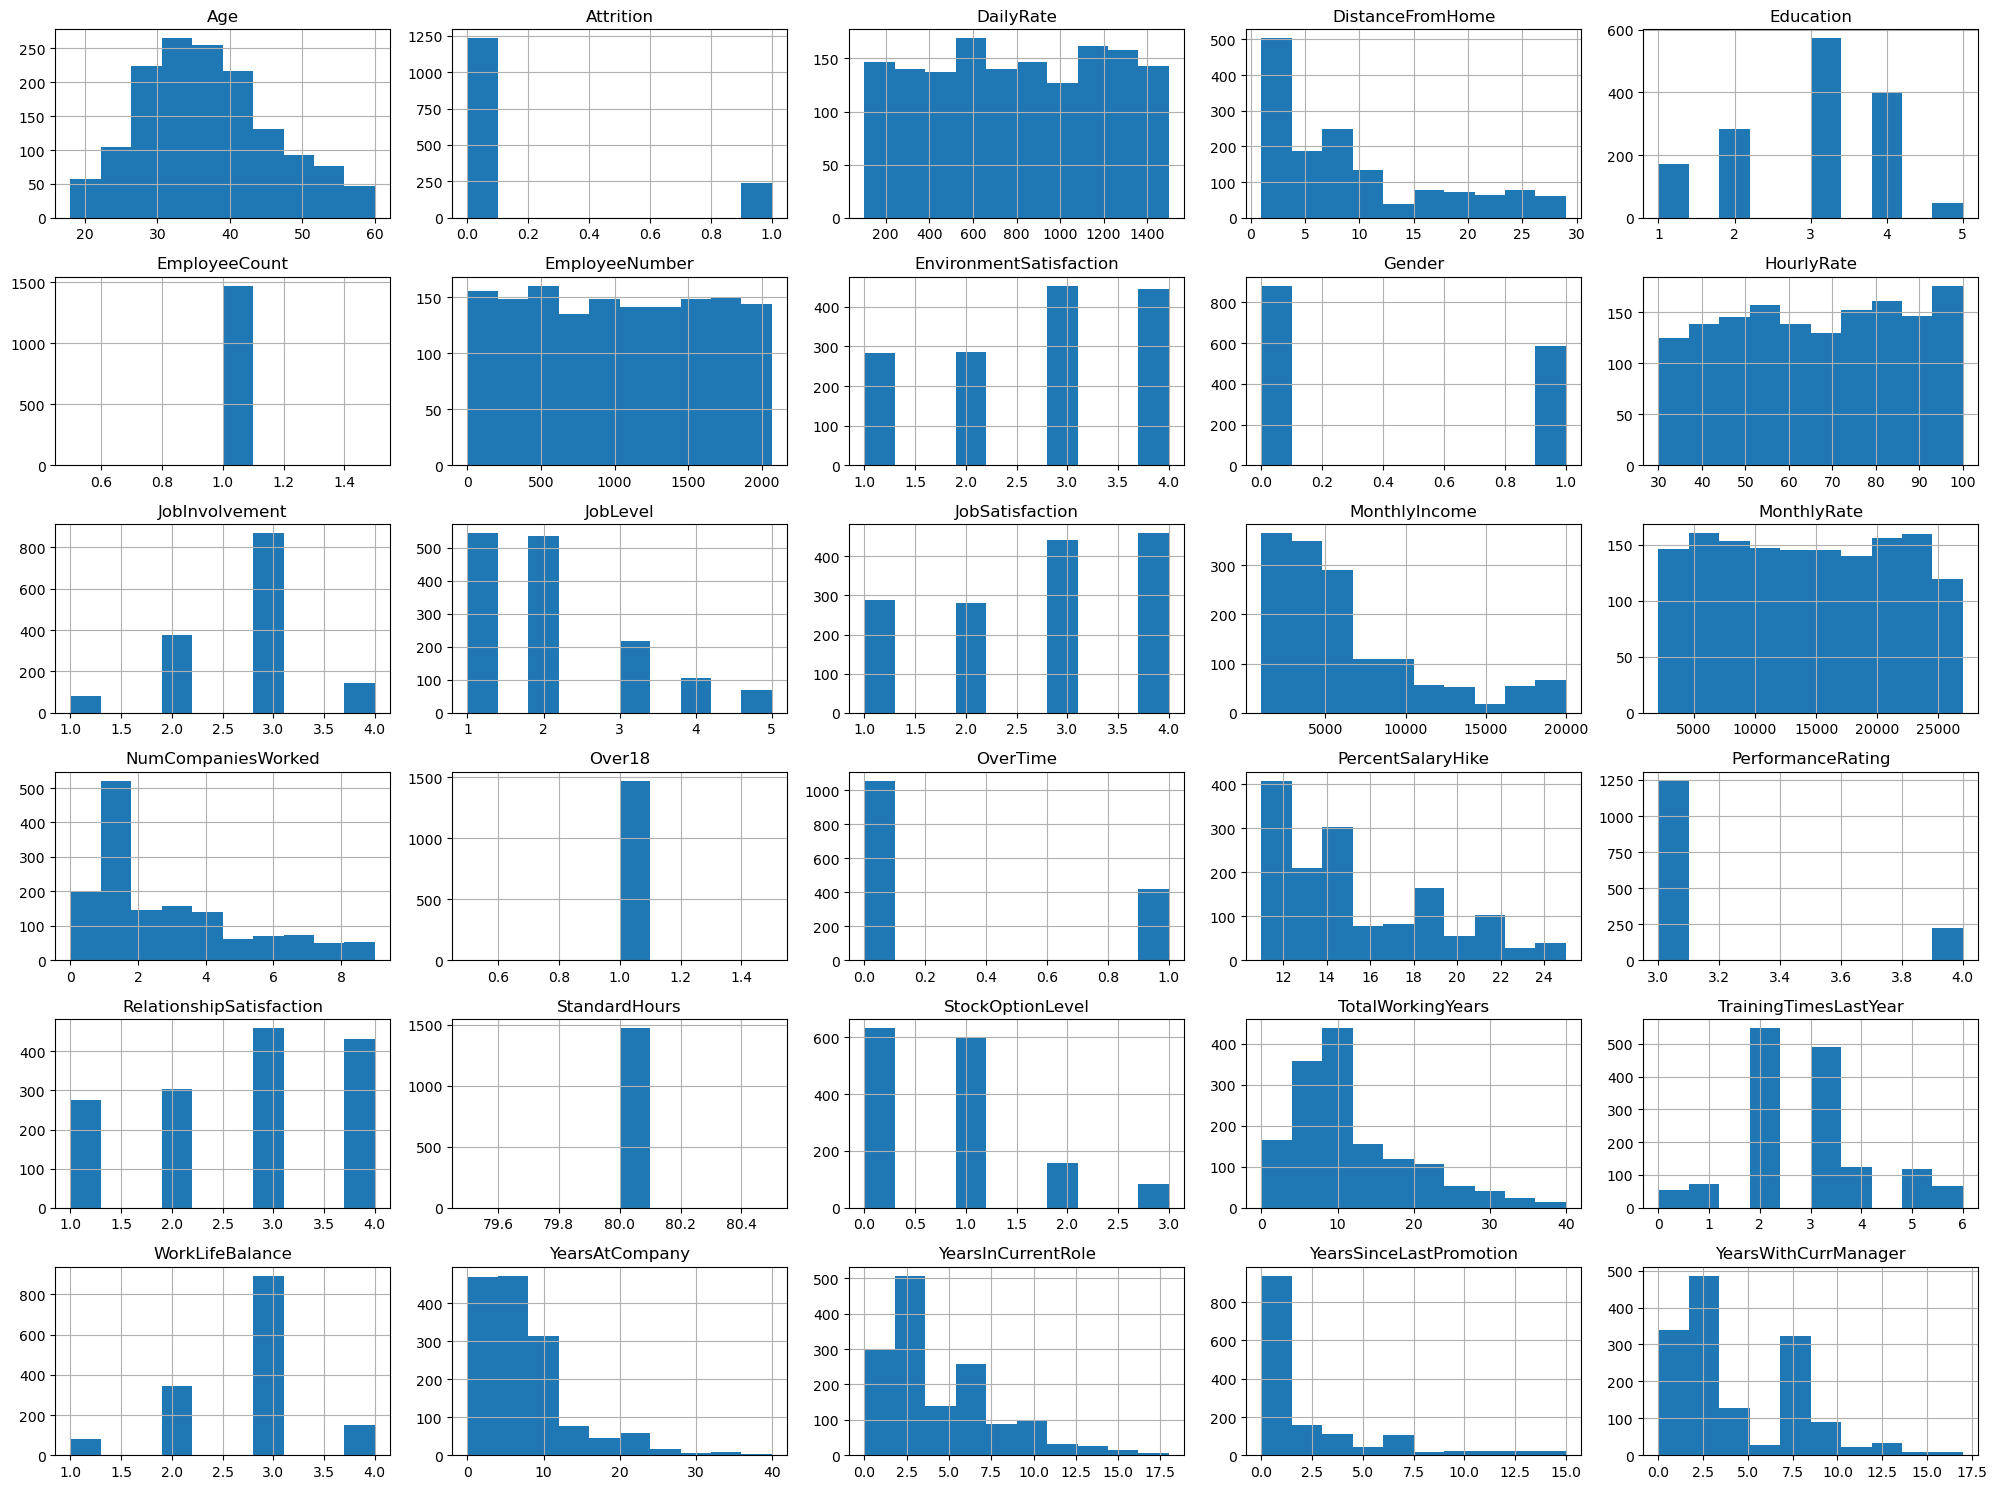

In [18]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

### Droping columns with constant values

In [19]:
df= df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])
print("df shape:", df.shape)
df.head()

df shape: (1470, 32)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,1,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,0,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,0,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,1,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,0,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


### One Hot Encoding

In [20]:
df= pd.get_dummies(df, drop_first=True)
df= df.astype(int)
print("df one hot encoded shape:", df.shape)
df.head()

df one hot encoded shape: (1470, 46)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,2,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,7,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


## Resampling
Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
- We are going to use Over Sampling.
- We will not use Under Sampling to avoid data loss.

In [21]:
X_one= df.drop(columns=["Attrition", "EmployeeNumber"], axis=1)
y_one= df['Attrition']

In [22]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y_one))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X_one,y_one)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [24]:
# Sanity check for the sampled data
print(X_train_one.shape)
print(y_train_one.shape)
print(X_test_one.shape)
print(y_test_one.shape)

(1972, 44)
(1972,)
(494, 44)
(494,)


### Finding columns with constant values

In [25]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train_one)

VarianceThreshold(threshold=0)

In [26]:
const_cols= [col for col in X_train_one.columns
                if col not in X_train_one.columns[var_thres.get_support()]]
print(len(const_cols))

for feature in const_cols:
    print(feature)

0


There are no columns with constant values

### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report

### Standard Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'JobSatisfaction', 
                'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
                'TrainingTimesLastYear', 'YearsAtCompany', 'EnvironmentSatisfaction', 'YearsSinceLastPromotion', 'JobInvolvement',
               'WorkLifeBalance', 'RelationshipSatisfaction', 'Education']

scaler= StandardScaler()
X_train_one[numeric_cols] = scaler.fit_transform(X_train_one[numeric_cols])
X_train_one.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
463,-1.022927,-0.762014,1.754576,0.081800,0.355863,0,0.001320,-2.169284,-0.828889,1.220190,2340,1.242765,-0.689090,1,0.766045,3,-0.600025,-0.808915,1,0.207552,-2.331985,-0.834438,0,-0.658083,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1037,0.970677,1.654688,2.363071,0.081800,-0.518062,0,-0.538825,0.485279,1.023313,1.220190,9380,0.057693,0.457972,1,0.766045,3,1.240175,1.445757,10,1.003843,1.712583,-0.518510,1,-0.340321,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1114,1.285457,0.813666,0.659285,1.071435,0.355863,1,-0.047784,0.485279,-0.828889,-1.463321,2367,0.310252,1.987388,0,-0.854235,3,1.240175,0.318421,10,0.207552,-0.983795,0.271311,2,1.566250,6,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1503,-0.183515,1.441959,1.146081,0.081800,-1.391986,0,0.050424,1.812560,0.097212,1.220190,5304,-1.347146,1.987388,1,-0.584188,3,-0.600025,-0.808915,9,0.207552,-0.983795,-0.202582,2,-0.658083,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1818,1.285457,-0.175772,-0.314307,-0.907834,1.229787,1,1.425337,0.485279,-0.828889,0.325686,2655,-0.358121,-0.306736,1,-1.124281,3,0.320075,1.445757,19,0.207552,0.364394,0.429275,7,1.566250,7,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [29]:
scaler= StandardScaler()
X_test_one[numeric_cols] = scaler.fit_transform(X_test_one[numeric_cols])
X_test_one.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1078,0.932844,-1.696720,2.168803,0.212835,1.178999,0,-1.651440,0.476273,1.996017,-1.477634,16328,1.113606,0.067328,0,-0.607615,3,0.272557,0.503824,24,-1.482841,1.715633,2.380719,6,3.830789,17,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1281,-0.021904,-1.281760,2.050247,0.212835,0.278805,0,0.979230,0.476273,0.092480,1.219230,5813,-0.094228,-0.715265,1,0.715850,3,1.194770,-0.728300,10,-0.630078,0.357424,0.640448,7,1.598798,7,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
621,0.084179,0.271235,-1.032203,-0.788502,-0.621389,0,-0.437284,0.476273,0.092480,1.219230,6201,-1.595788,-0.715265,1,-0.342922,3,1.194770,0.503824,18,-1.482841,-1.000786,2.032665,14,0.642230,11,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1508,-0.340153,-1.005948,-0.913648,1.214171,0.278805,0,0.878051,-0.852986,0.092480,-0.578679,9907,1.692331,1.632515,1,-0.872309,3,0.272557,-0.728300,7,0.222685,-1.000786,-0.751769,2,0.004518,2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1975,-1.719234,-0.819589,-0.913648,-0.788502,-1.521583,0,-0.639644,-0.852986,-0.859289,1.219230,2564,0.601733,-0.715265,0,-0.872309,3,0.272557,-0.728300,1,0.222685,1.715633,-0.925796,0,-0.633194,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1


# Logistic Regression Model

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train_one, y_train_one)

LogisticRegression()

In [31]:
y_pred2= logreg.predict(X_test_one)
y_pred2

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [32]:
y_test_one

1078    0
1281    1
621     0
1508    1
1975    1
       ..
2099    1
1836    1
303     0
1864    1
141     0
Name: Attrition, Length: 494, dtype: int32

# Performace of the Model 

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       250
           1       0.74      0.71      0.72       244

    accuracy                           0.73       494
   macro avg       0.73      0.73      0.73       494
weighted avg       0.73      0.73      0.73       494



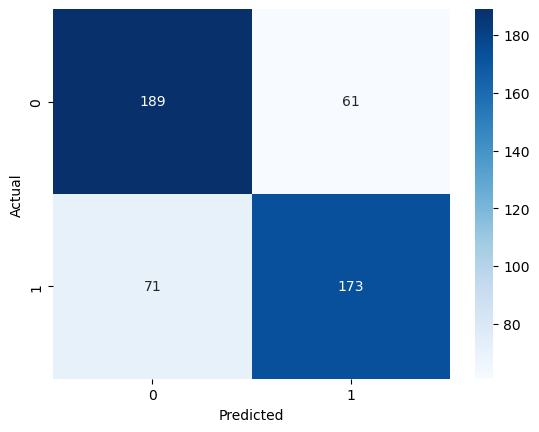

In [33]:
# print Accuracy
print(f"Accuracy: {accuracy_score(y_test_one, y_pred2):.2f}\n")

# Print the classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test_one, y_pred2))

# Display the confusion matrix
cm = confusion_matrix(y_test_one, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Saving the Model

In [34]:
import joblib

joblib.dump(logreg, 'my_logistic_regression_model.joblib')

['my_logistic_regression_model.joblib']

In [3]:
pip show pandoc

Name: pandoc
Version: 2.4
Summary: Pandoc Documents for Python
Home-page: 
Author: SÃ©bastien BoisgÃ©rault
Author-email: Sebastien.Boisgerault@minesparis.psl.eu
License: MIT License
Location: C:\Users\soumitra\AppData\Roaming\Python\Python312\site-packages
Requires: plumbum, ply
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show pandoc

Name: pandoc
Version: 2.4
Summary: Pandoc Documents for Python
Home-page: 
Author: SÃ©bastien BoisgÃ©rault
Author-email: Sebastien.Boisgerault@minesparis.psl.eu
License: MIT License
Location: C:\Users\soumitra\AppData\Roaming\Python\Python312\site-packages
Requires: plumbum, ply
Required-by: 
Note: you may need to restart the kernel to use updated packages.
